# Creating a Churn Predictor 


## Load the dataset and explore the variables.


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
round(df.describe(),2)

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.


In [6]:
#Extract independent variables,scaling pending
df1 = df[['tenure', 'SeniorCitizen','MonthlyCharges']]

### Extract target variable

In [7]:
targetvar=df.iloc[:,-1]

In [8]:
targetvar

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [9]:
#replacing yes/no with 1/0 

targetvar.replace({"Yes":1, "No":0}, inplace = True)

In [10]:
targetvar

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

### 4. Extract independent variables


In [11]:
indepvar=df[['tenure', 'SeniorCitizen','MonthlyCharges']]

In [12]:
cols = indepvar.columns

In [13]:
indepvar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   SeniorCitizen   7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 165.2 KB


### 4. Scaling independent variables

In [14]:
corr_matrix =indepvar.corr()

<AxesSubplot:>

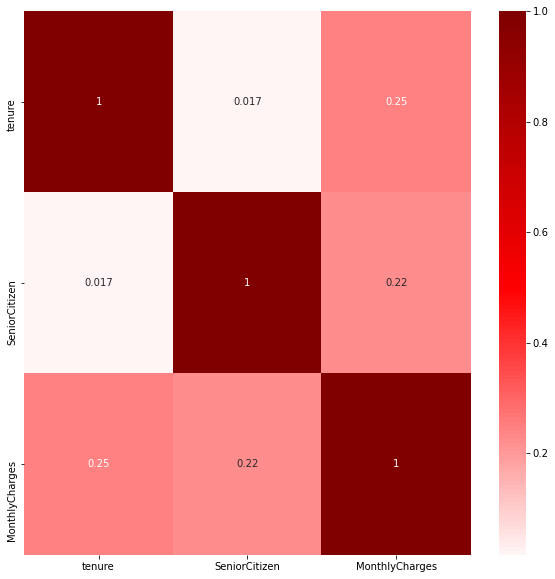

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,cmap='seismic',center=0,annot=True)

In [16]:
# using Min/Max to scale as there are Columns that do not make sense to be scaled using StanardScaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
indepvar= pd.DataFrame(minmax.fit_transform(indepvar))

In [17]:
indepvar

,0,1,2
0,0.013889,0.0,0.115423
1,0.472222,0.0,0.385075
2,0.027778,0.0,0.354229
3,0.625000,0.0,0.239303
4,0.027778,0.0,0.521891
...,...,...,...
7038,0.333333,0.0,0.662189
7039,1.000000,0.0,0.845274
7040,0.152778,0.0,0.112935
7041,0.055556,1.0,0.558706


### 5.  Build the logistic regression model.


In [18]:
from sklearn.linear_model import LogisticRegression #model 
from sklearn.model_selection import train_test_split #train/test split
from sklearn.metrics import confusion_matrix , plot_confusion_matrix# evaluation
from sklearn.metrics import classification_report # evaluation
from sklearn.metrics import accuracy_score 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(indepvar, targetvar, test_size=0.3, random_state=40)

In [20]:
lr = LogisticRegression(max_iter=400)

In [21]:
lr.fit(X_train,y_train)


LogisticRegression(max_iter=400)

In [22]:
y_pred=lr.predict(X_test)


## 6. Evaluate the model.


In [23]:
accuracy_score(y_test,y_pred)

0.7827733080927591

In [24]:
    confusion_matrix (y_test, y_pred)

array([[1409,  144],
       [ 315,  245]], dtype=int64)

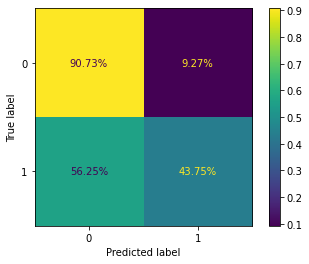

In [25]:
plot_confusion_matrix(lr, X_test,y_test,normalize='true',values_format= '.2%')
plt.show()

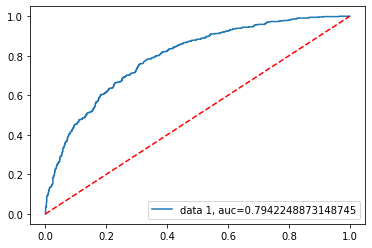

In [26]:
import sklearn.metrics as metrics
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1],[0,1],'r--') #adds red line to middle of the plot
plt.legend(loc=4)
plt.show()

### 8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. 
### Apply imblearn.over_sampling.SMOTE to the dataset.
### Build and evaluate the logistic regression model. Is it there any improvement? Not really, no. We seem to be achieving a lower accuracy score as we over sample

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [28]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [29]:
len(X_train)

4930

In [30]:
len(X_train_sm)

7242

In [31]:
#fit to train - smote
lr.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=400)

In [32]:
# y smote predictions
y_pred_sm=lr.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred_sm)

0.709891150023663

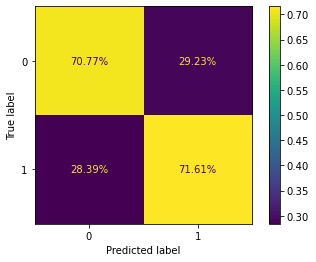

In [34]:
plot_confusion_matrix(lr,X_test,y_test,normalize='true',values_format= '.2%')

### 9. Tomek links are pairs of very close instances, but of opposite classes. 
### Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. 
### Build and evaluate the logistic regression model. Is it there any improvement? Some improvement from Over sampling, however our original Logistic Model 

In [35]:

from imblearn.under_sampling import TomekLinks
tomek= TomekLinks(sampling_strategy = 'majority')

In [36]:
X_train_tk, y_train_tk = tomek.fit_resample(X_train, y_train)

In [37]:
lr.fit(X_train_tk,y_train_tk)

LogisticRegression(max_iter=400)

In [38]:
y_train_tk.value_counts()

0    3282
1    1309
Name: Churn, dtype: int64

In [39]:
y_train.value_counts()

0    3621
1    1309
Name: Churn, dtype: int64

In [40]:
y_pred_tk=lr.predict(X_test)

In [41]:
accuracy_score(y_test,y_pred_tk)

0.7681022243256034

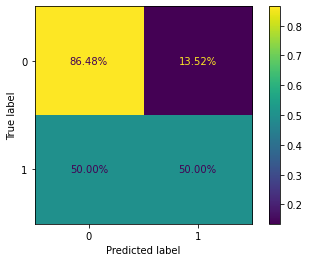

In [42]:
plot_confusion_matrix(lr,X_test,y_test,normalize='true',values_format= '.2%' )